In [39]:
import os
import numpy
import SimpleITK
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We're gonna use this function to quickly plot a 2D SimpleITK image with a grayscale colormap and accompanying axes

In [23]:
def sitk_show(img, title=None, margin=0.0, dpi=40):
    nda = SimpleITK.GetArrayFromImage(img)
    #spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    #extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    extent = (0, nda.shape[1], nda.shape[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

In [31]:
# Paths to the .mhd files
filenameT1 = "/home/omar/Documents/SpineProject/02_inputMhdPython/patient0002/4533808/4533808.mhd"
filenameT2 = "/home/omar/Documents/SpineProject/02_inputMhdPython/patient0002/4533809/4533809.mhd"

# Slice index to visualize with 'sitk_show'
idxSlice = 150

# int label to assign to the segmented gray matter
labelGrayMatter = 1

In [17]:
imgT1Original = SimpleITK.ReadImage(filenameT1)
imgT2Original = SimpleITK.ReadImage(filenameT2)

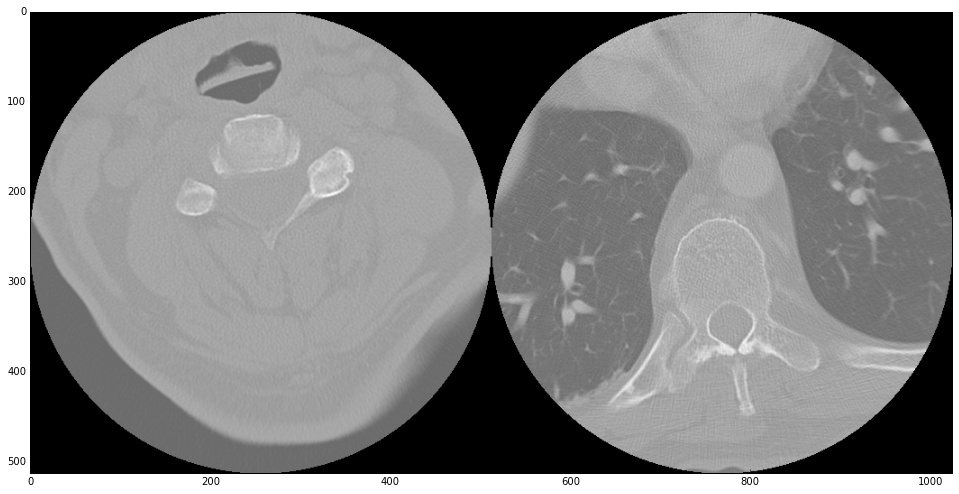

In [32]:
sitk_show(SimpleITK.Tile(imgT1Original[:, :, idxSlice],
                         imgT2Original[:, :, idxSlice],
                         (2, 1, 0)))

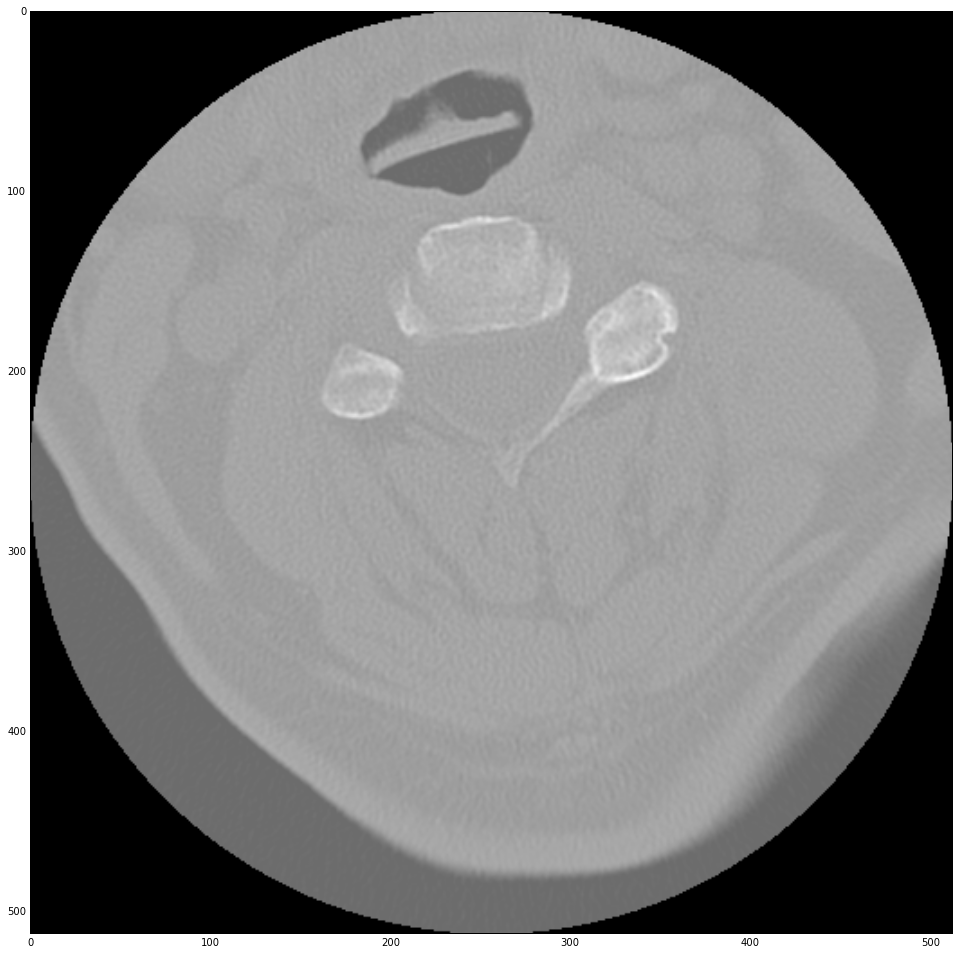

In [34]:
sitk_show(imgT1Original[:,:,idxSlice])

In [46]:
sigma=imgT1Original.GetSpacing()[0]
level=0

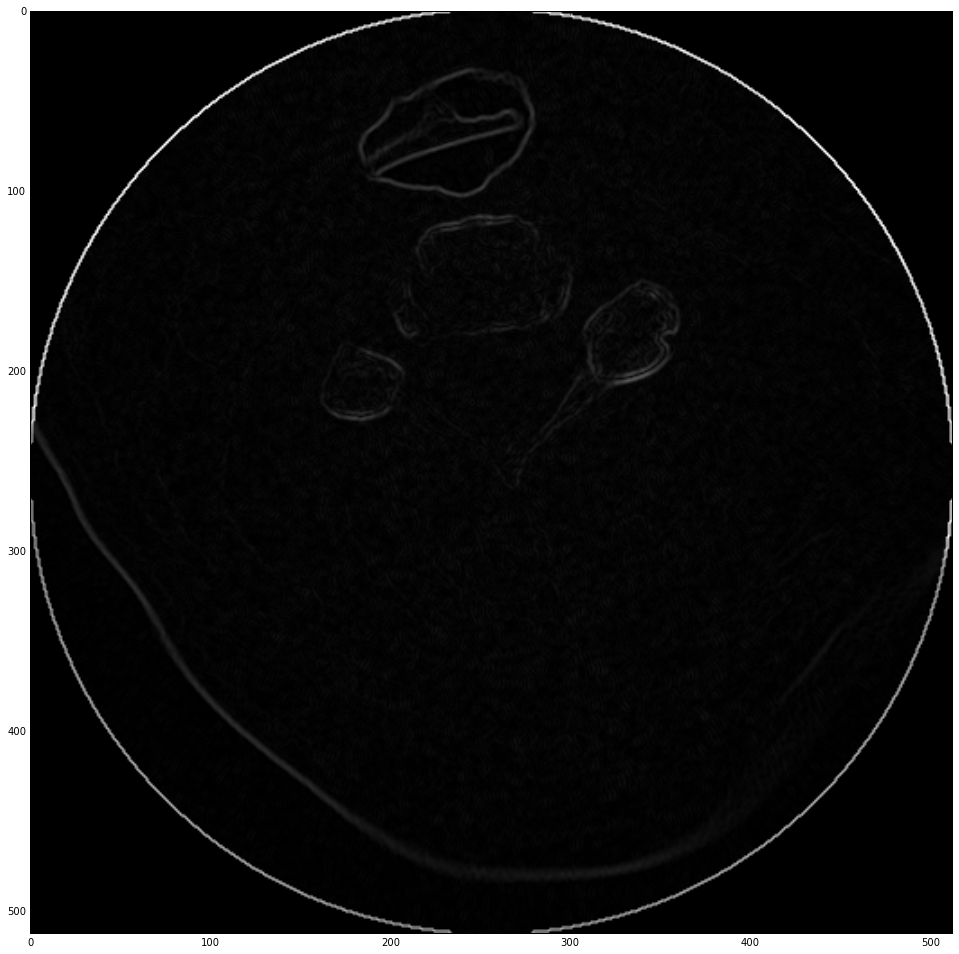

In [48]:
feature_img = SimpleITK.GradientMagnitude(imgT1Original[:,:,idxSlice])
sitk_show(feature_img)

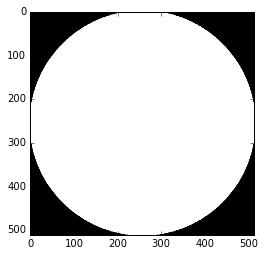

In [61]:
from scipy import ndimage as ndi

nda = SimpleITK.GetArrayFromImage(feature_img)
fill_bone = ndi.binary_fill_holes(nda)
plt.imshow(fill_bone)
#fill_bone2 = SimpleITK.GetImageFromArray(fill_bone,True)
#sitk_show(fill_bone2)